In [32]:
%reload_ext autoreload
%autoreload 2

import torch
import torchvision
import os
import utils
import dataset
import engine
import model7
import config
import torchvision.datasets as datasets
import cuda
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import numpy as np

In [2]:
cuda, device = cuda.initialize_cuda(config.SEED)

GPU Available? True


In [3]:
trainset = dataset.torch_datasets(True, True, dataset_name='cifar10')
testset = dataset.torch_datasets(False, True, dataset_name='cifar10')

Files already downloaded and verified
Files already downloaded and verified


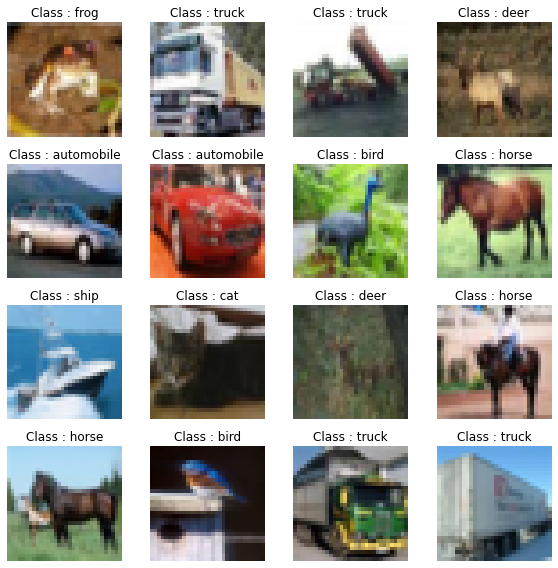

In [4]:
utils.show_imgs(trainset, 16, (8, 8))

In [5]:
mean, std = utils.get_stats(trainset)[0], utils.get_stats(trainset)[1]
print(mean, std)

(0.4914, 0.4822, 0.4465) (0.247, 0.2435, 0.2616)


In [6]:
transformations_list = [transforms.Normalize(mean, std)]
augmentations_list = [transforms.RandomRotation(7)]

In [7]:
trainset = dataset.torch_datasets(True, True, transformations_list, augmentations_list, dataset_name='cifar10')
testset = dataset.torch_datasets(False, True, transformations_list, dataset_name='cifar10')
train_dl = dataset.data_loader(trainset, config.BATCH_SIZE, config.NUM_WORKERS, cuda, shuffle=True)
test_dl = dataset.data_loader(testset, config.BATCH_SIZE, config.NUM_WORKERS, cuda, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


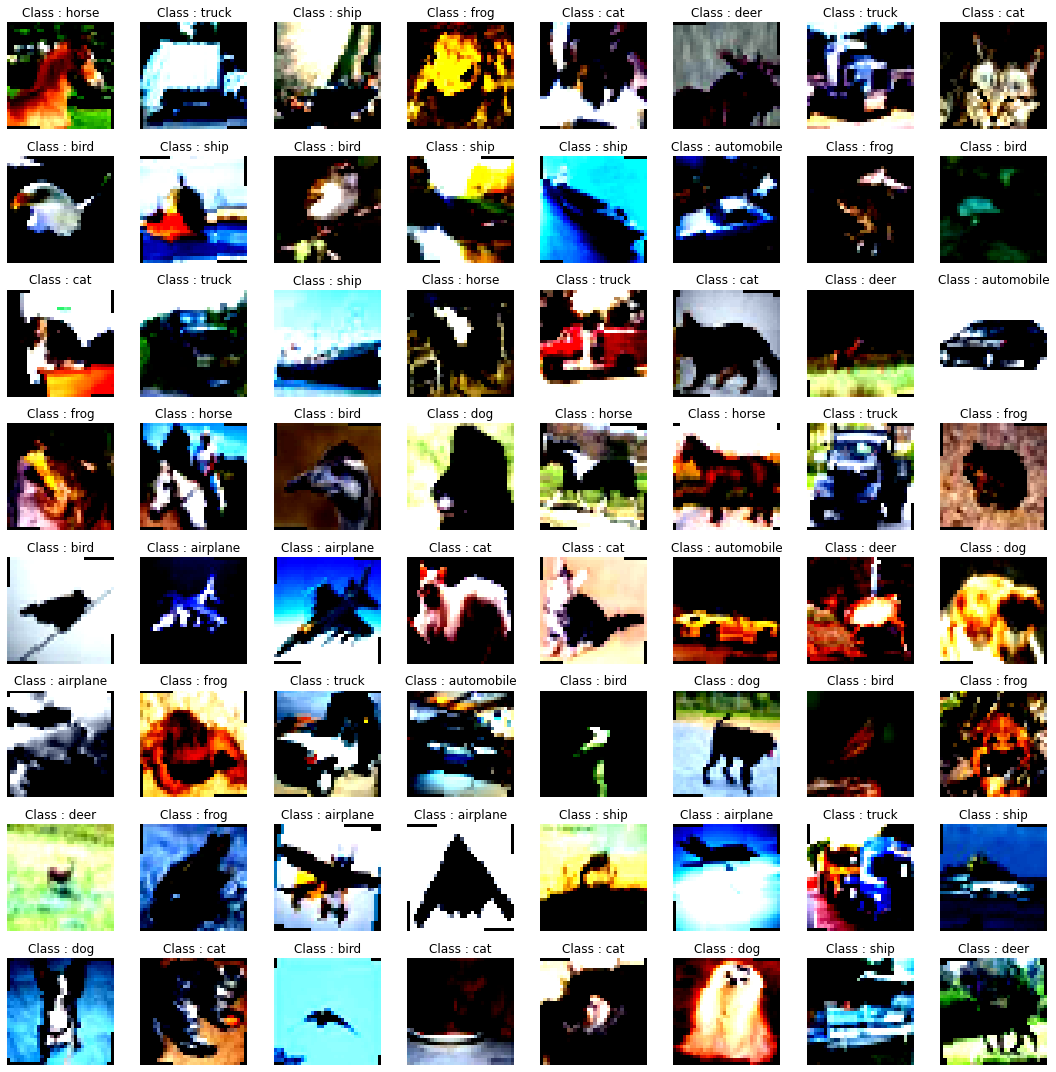

In [8]:
utils.show_batch(train_dl)

In [9]:
#Set Dropout and define model
config.DROPOUT = 0.1
model = model7.Net(config.DROPOUT).to(device)

In [10]:
utils.summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           2,080
           Conv2d-11           [-1, 32, 16, 16]           9,248
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1, 32,

In [17]:
config.DROPOUT = 0.1
model = model7.Net(config.DROPOUT).to(device)
loss_fn = utils.cross_entropy_loss_fn()
optimizer = utils.sgd_optimizer(model)
if config.DEBUG == True:
    config.EPOCHS = 2

test_loss = []
test_accuracy = []
misclassified_imgs = []
for epoch in range(config.EPOCHS):
    print(f"Running Epoch {epoch+1}/{config.EPOCHS}\n")
    engine.train(model, train_dl, optimizer, loss_fn, device)
    engine.test(model, test_dl, loss_fn, device, 25, test_loss, test_accuracy, misclassified_imgs)

  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

Running Epoch 1/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0179, Accuracy: 5811/10000 (58.11%)

Running Epoch 2/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0149, Accuracy: 6644/10000 (66.44%)

Running Epoch 3/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 6964/10000 (69.64%)

Running Epoch 4/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0116, Accuracy: 7443/10000 (74.43%)

Running Epoch 5/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0110, Accuracy: 7598/10000 (75.98%)

Running Epoch 6/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0103, Accuracy: 7685/10000 (76.85%)

Running Epoch 7/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0100, Accuracy: 7791/10000 (77.91%)

Running Epoch 8/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0098, Accuracy: 7887/10000 (78.87%)

Running Epoch 9/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0095, Accuracy: 7901/10000 (79.01%)

Running Epoch 10/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0091, Accuracy: 8016/10000 (80.16%)

Running Epoch 11/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0092, Accuracy: 7985/10000 (79.85%)

Running Epoch 12/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8140/10000 (81.40%)

Running Epoch 13/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0089, Accuracy: 8097/10000 (80.97%)

Running Epoch 14/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0085, Accuracy: 8178/10000 (81.78%)

Running Epoch 15/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0085, Accuracy: 8128/10000 (81.28%)

Running Epoch 16/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0084, Accuracy: 8185/10000 (81.85%)

Running Epoch 17/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0084, Accuracy: 8164/10000 (81.64%)

Running Epoch 18/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 8141/10000 (81.41%)

Running Epoch 19/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 8275/10000 (82.75%)

Running Epoch 20/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0082, Accuracy: 8231/10000 (82.31%)

Running Epoch 21/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0084, Accuracy: 8211/10000 (82.11%)

Running Epoch 22/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8314/10000 (83.14%)

Running Epoch 23/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0085, Accuracy: 8209/10000 (82.09%)

Running Epoch 24/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0075, Accuracy: 8361/10000 (83.61%)

Running Epoch 25/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8353/10000 (83.53%)

Running Epoch 26/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8362/10000 (83.62%)

Running Epoch 27/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 8319/10000 (83.19%)

Running Epoch 28/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0075, Accuracy: 8372/10000 (83.72%)

Running Epoch 29/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 8373/10000 (83.73%)

Running Epoch 30/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0082, Accuracy: 8296/10000 (82.96%)

Running Epoch 31/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8337/10000 (83.37%)

Running Epoch 32/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 8395/10000 (83.95%)

Running Epoch 33/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 8365/10000 (83.65%)

Running Epoch 34/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 8396/10000 (83.96%)

Running Epoch 35/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0074, Accuracy: 8394/10000 (83.94%)

Running Epoch 36/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0075, Accuracy: 8400/10000 (84.00%)

Running Epoch 37/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0074, Accuracy: 8448/10000 (84.48%)

Running Epoch 38/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 8420/10000 (84.20%)

Running Epoch 39/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 8466/10000 (84.66%)

Running Epoch 40/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8431/10000 (84.31%)

Running Epoch 41/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0075, Accuracy: 8425/10000 (84.25%)

Running Epoch 42/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 8448/10000 (84.48%)

Running Epoch 43/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8433/10000 (84.33%)

Running Epoch 44/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0071, Accuracy: 8457/10000 (84.57%)

Running Epoch 45/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8448/10000 (84.48%)

Running Epoch 46/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8495/10000 (84.95%)

Running Epoch 47/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8464/10000 (84.64%)

Running Epoch 48/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 8464/10000 (84.64%)

Running Epoch 49/50



  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0071, Accuracy: 8479/10000 (84.79%)

Running Epoch 50/50



Loss=0.32 Batch_ID=781 Accuracy=87.65: 100%|█████████████████████████████████████████| 782/782 [01:55<00:00,  6.78it/s]



Validation set: Average loss: 0.0073, Accuracy: 8482/10000 (84.82%)



# Misclassified Images

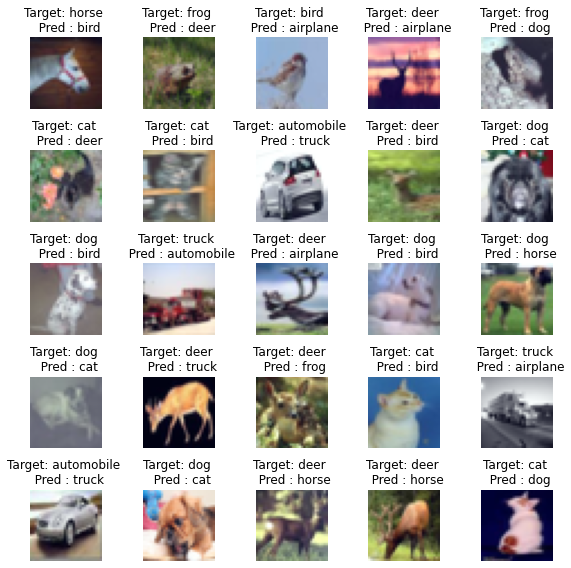

In [33]:
class_idx = trainset.class_to_idx
utils.plot_incorrect_images(misclassified_imgs, class_idx, plot_size=(8, 8))

# Validation Plots

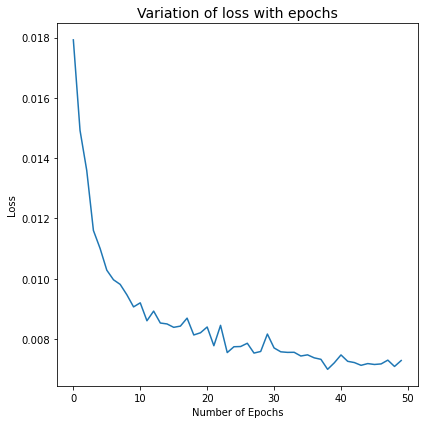

In [30]:
utils.plot_metrics([{'metric':test_loss, 'label':'Validation Loss'}], "Loss")

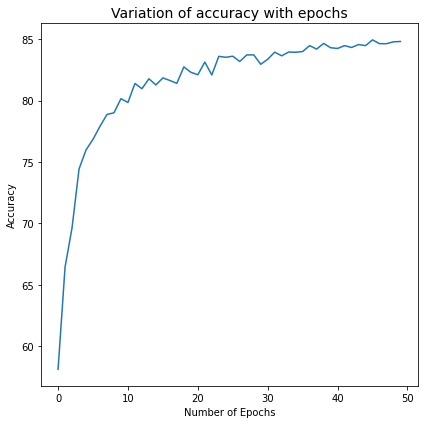

In [31]:
utils.plot_metrics([{'metric':test_accuracy, 'label':'Validation Accuracy'}], "Accuracy")